In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
all_evaluations = pd.read_csv("./evaluations/all_evaluations.csv")
all_evaluations

,target,browser,player,codec,platform,user,data_points,mean,stdev,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10
0,codec,CHROME,MPLAYER,*,Windows11,*,400,55.750000,5.623611,56.250000,55.000000,58.750000,46.250000,58.750000,45.000000,63.750000,58.750000,55.000000,60.000000
1,codec,CHROME,MPV,*,Windows11,*,400,67.500000,6.224950,70.000000,72.500000,70.000000,63.750000,55.000000,58.750000,67.500000,76.250000,68.750000,72.500000
2,codec,CHROME,VLC,*,Windows11,*,400,66.625000,4.071624,60.000000,68.750000,66.250000,70.000000,61.250000,62.500000,68.750000,68.750000,66.250000,73.750000
3,codec,EDGE,MPLAYER,*,Windows11,*,400,68.875000,3.233129,70.000000,70.000000,70.000000,71.250000,65.000000,61.250000,70.000000,67.500000,71.250000,72.500000
4,codec,EDGE,MPV,*,Windows11,*,400,89.750000,2.076656,91.250000,90.000000,92.500000,92.500000,90.000000,86.250000,88.750000,87.500000,87.500000,91.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,player,*,*,*,*,*,14400,82.187500,0.769393,83.090278,82.395833,83.298611,82.881944,81.562500,82.187500,82.534722,81.666667,81.527778,80.729167
303,codec,*,MPLAYER,*,*,*,4800,48.093750,1.226383,49.895833,46.354167,48.437500,48.750000,48.229167,46.562500,49.166667,46.979167,46.979167,49.583333
304,codec,*,MPV,*,*,*,4800,48.854167,0.653848,48.750000,49.166667,49.791667,47.500000,49.062500,48.958333,48.854167,49.687500,48.750000,48.020833
305,codec,*,VLC,*,*,*,4800,63.500000,1.412371,64.166667,62.395833,62.395833,63.854167,66.562500,64.479167,61.770833,61.770833,63.333333,64.270833


In [70]:
def filter_data(df, target, player, codec, browser, platform):
    if target is not None:
        df = df[all_evaluations["target"] == target]
    
    if codec is not None:
        df = df[df["codec"] == codec]

    if player is not None:
        df = df[df["player"] == player]
    
    if browser is not None:
        df = df[df["browser"] == browser]

    if platform is not None:
        df = df[df["platform"] == platform]

    return df

In [71]:
def transpose_data(df: pd.DataFrame):
    df_melted = df.melt(id_vars=["target", "browser", "player", "codec", "platform"], 
                   value_vars=["fold_1", "fold_2", "fold_3", "fold_4", "fold_5", "fold_6", "fold_7", "fold_8", "fold_9", "fold_10"], 
                   var_name="fold", value_name="value")
    return df_melted

In [72]:
browser_palette = {"CHROME": "C0", "FIREFOX": "C1", "EDGE": "C2", "SAFARI": "C3"}

# Plots

## Target = codec

### Each plot is separate browser

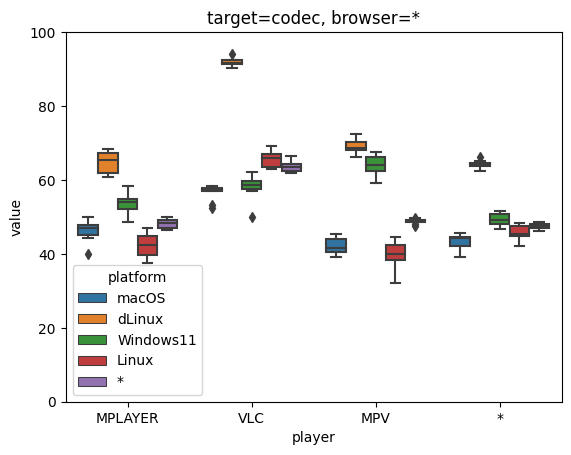

In [73]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="*", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=*")
plt.show()

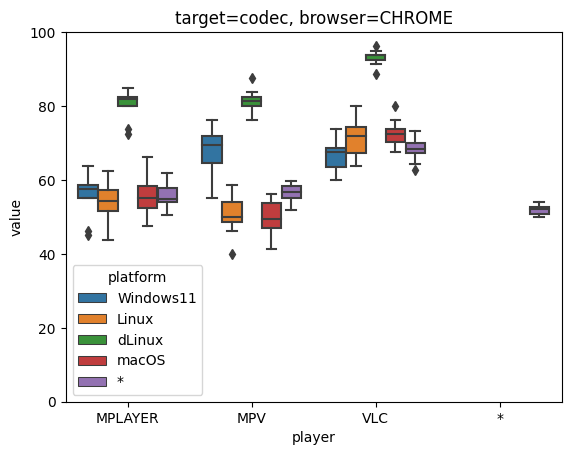

In [74]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="CHROME", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=CHROME")
plt.show()

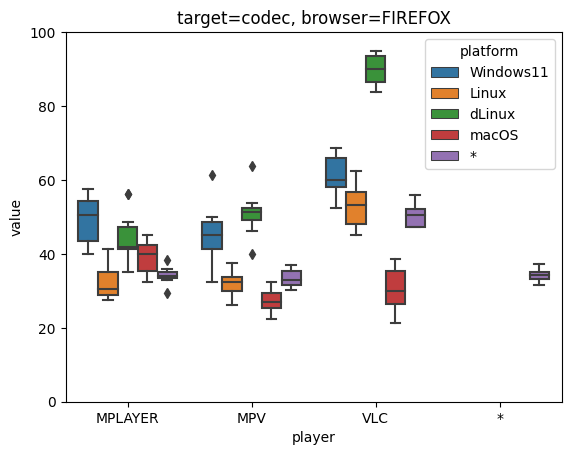

In [75]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="FIREFOX", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=FIREFOX")
plt.show()

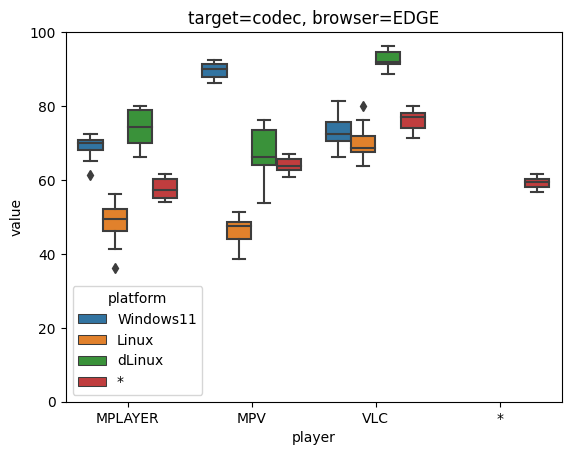

In [76]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="EDGE", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=EDGE")
plt.show()

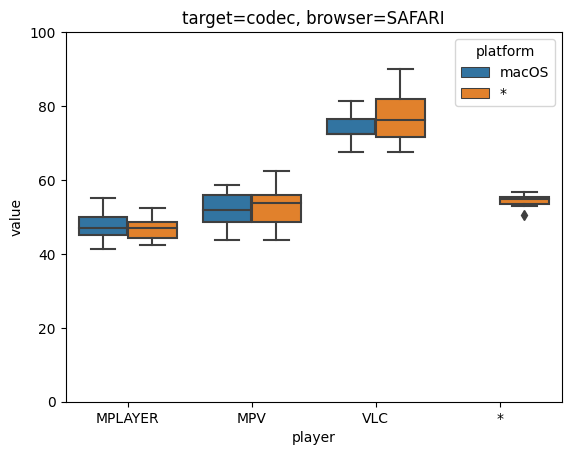

In [77]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="SAFARI", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=SAFARI")
plt.show()

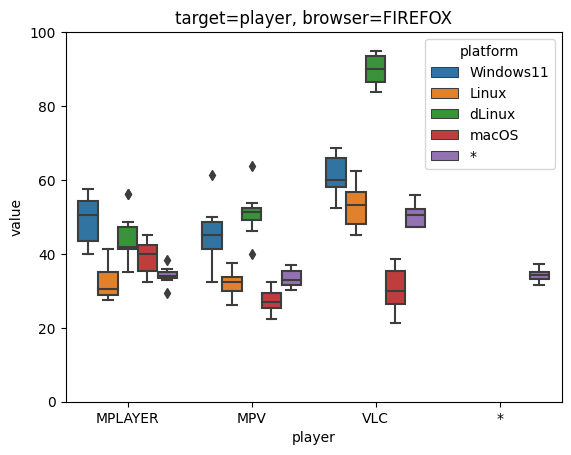

In [78]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="FIREFOX", platform=None))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=FIREFOX")
plt.show()

### Each plot is separate platform

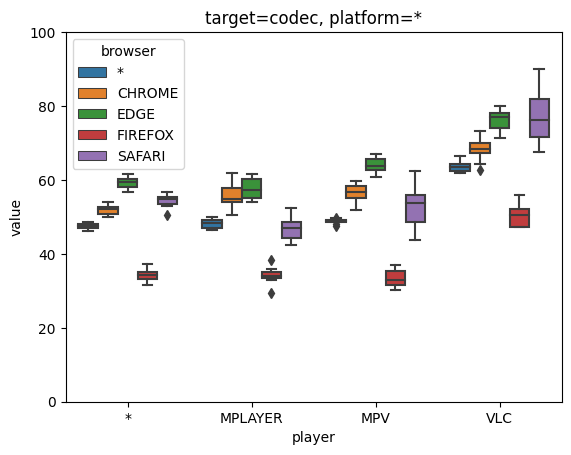

In [79]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="*"))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=*")
plt.show()

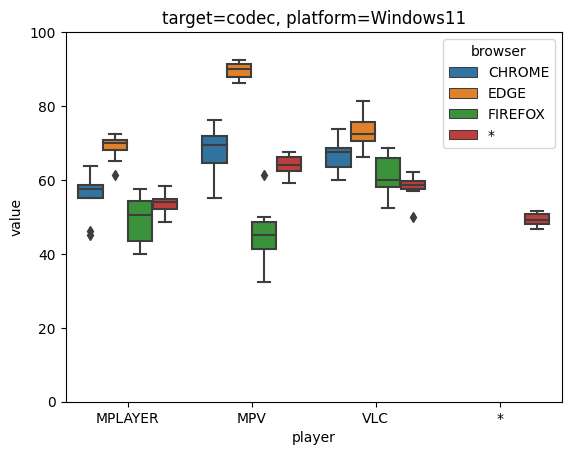

In [80]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="Windows11"))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=Windows11")
plt.show()

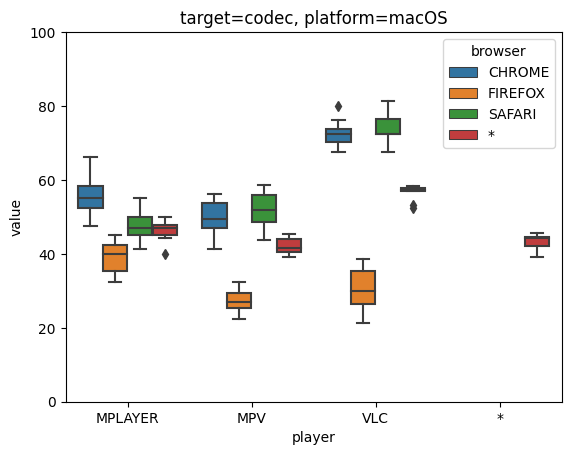

In [81]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="macOS"))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=macOS")
plt.show()

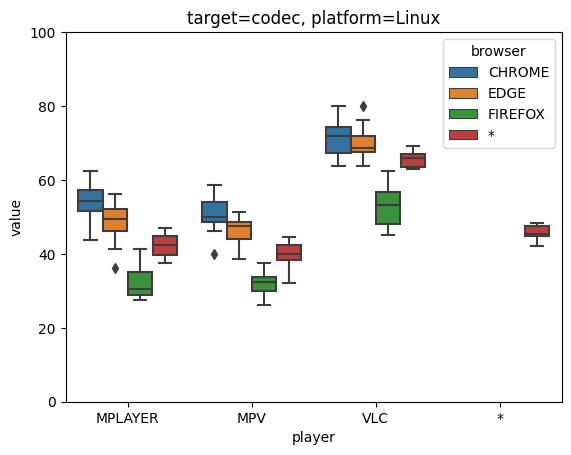

In [82]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="Linux"))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=Linux")
plt.show()

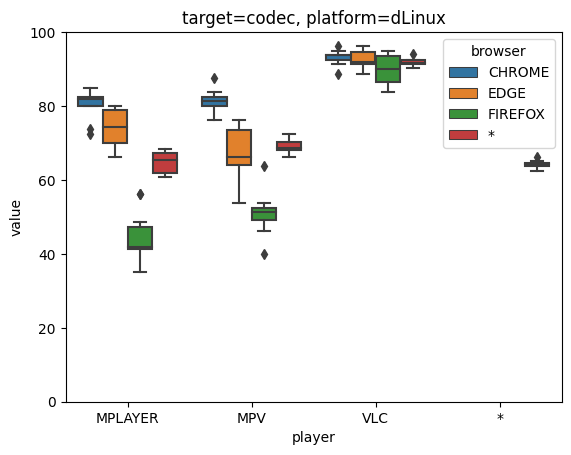

In [83]:
data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="dLinux"))
boxplot = sns.boxplot(data=data, x="player", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=dLinux")
plt.show()

## Target = player

### Each plot is separate browser

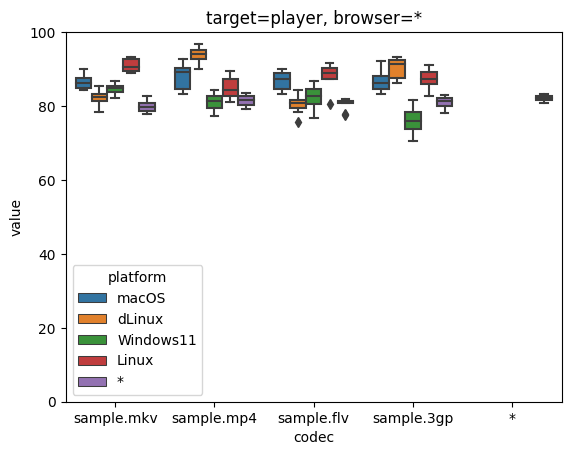

In [84]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="*", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=*")
plt.show()

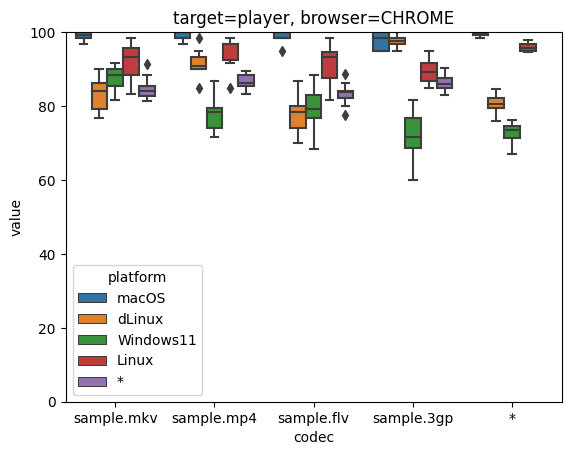

In [85]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="CHROME", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=CHROME")
plt.show()

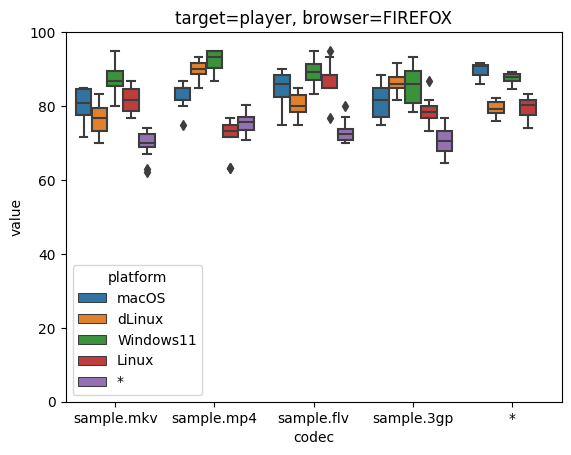

In [86]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="FIREFOX", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=FIREFOX")
plt.show()

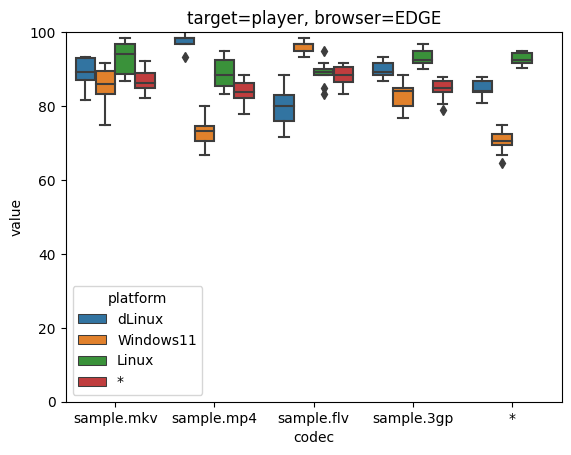

In [87]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="EDGE", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=EDGE")
plt.show()

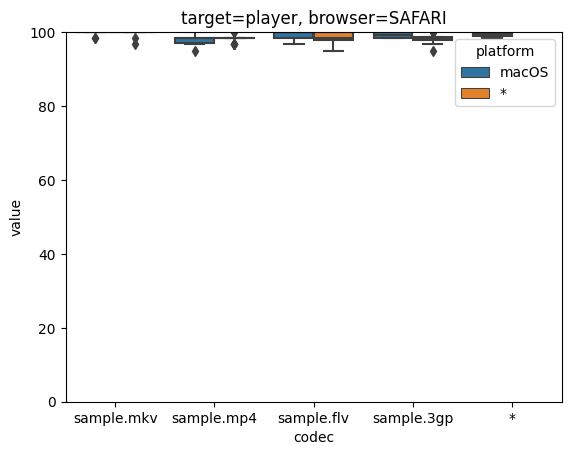

In [88]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="SAFARI", platform=None))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=SAFARI")
plt.show()

### Each plot is a separate platform

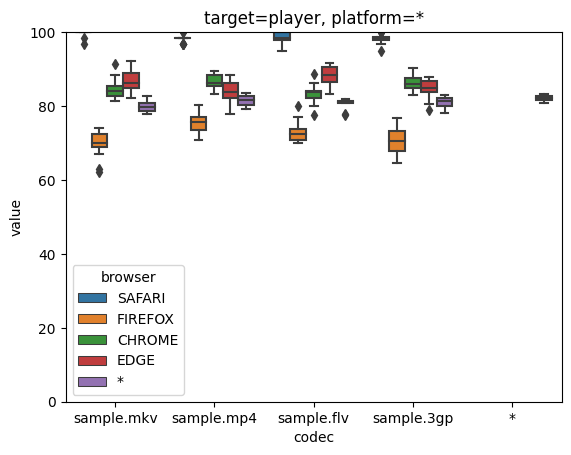

In [89]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="*"))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=*")
plt.show()

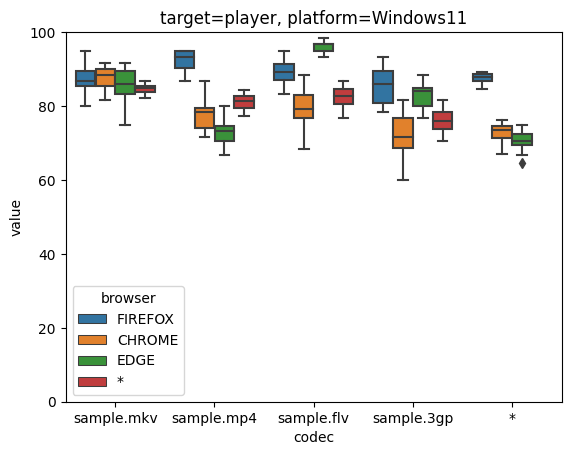

In [90]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="Windows11"))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=Windows11")
plt.show()

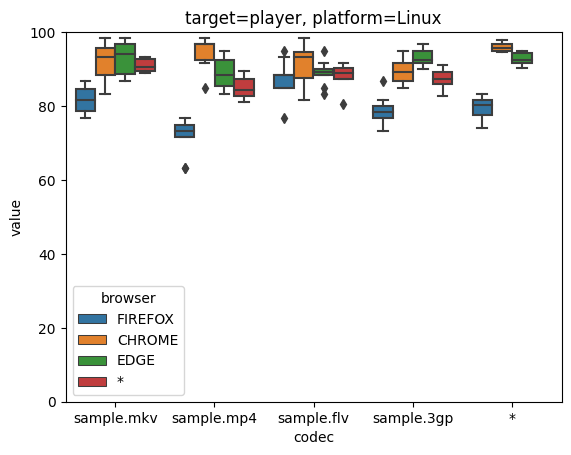

In [91]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="Linux"))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=Linux")
plt.show()

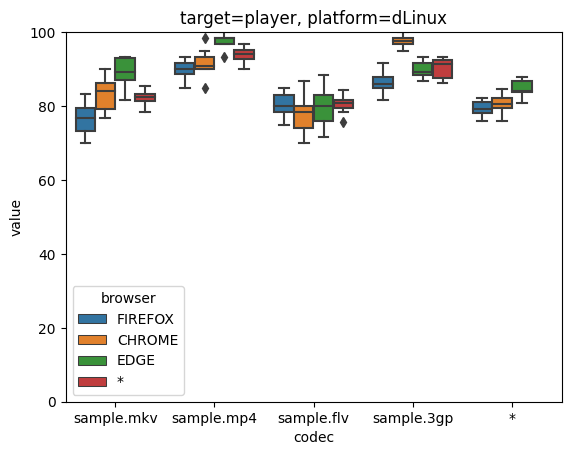

In [92]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="dLinux"))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=dLinux")
plt.show()

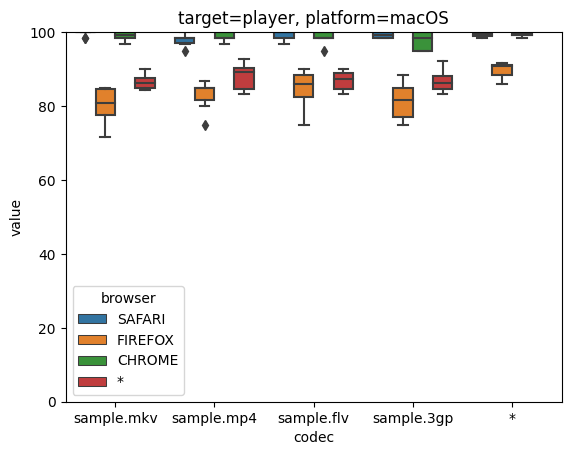

In [93]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="macOS"))
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=macOS")
plt.show()

# Experiments

Observation 0:
Variation is the smallest when player is fixed.

Observation 1:
VLC is more successful when predicting codec.

Observation 2:
Firefox is lower than other browsers when predicting codec.

Observation 3:
Different platforms perform similarly in general.

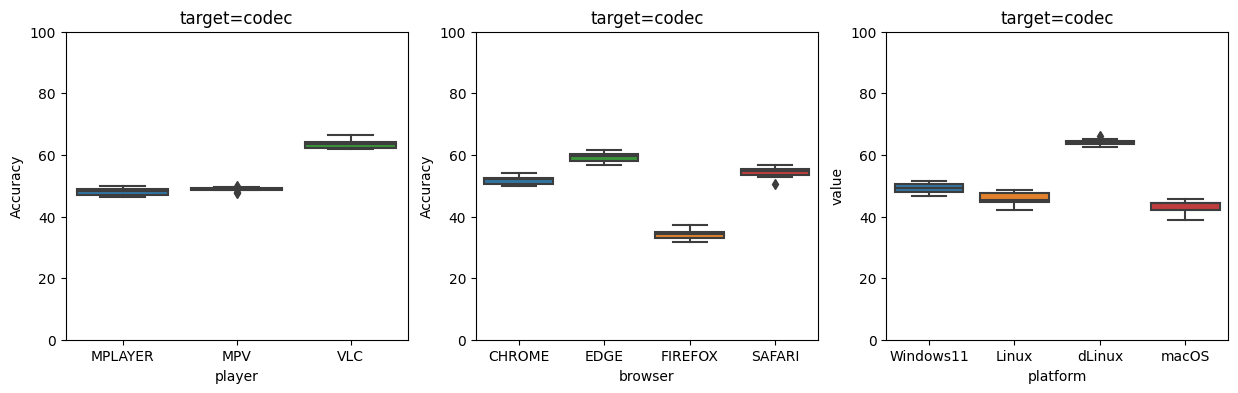

In [94]:
fig, axs = plt.subplots(1,3, figsize=(15, 4))

data1 = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec=None, browser="*", platform="*"))
data1 = data1[data1["player"] != "*"]
fig1 = sns.boxplot(ax=axs[0], data=data1, x="player", y="value")
fig1.set(ylim=(0,100), ylabel="Accuracy")
fig1.set_title("target=codec")

data2 = transpose_data(filter_data(all_evaluations, target="codec", player="*", codec=None, browser=None, platform="*"))
data2 = data2[data2["browser"] != "*"]
fig2 = sns.boxplot(ax=axs[1], data=data2, x="browser", y="value", palette=browser_palette)
fig2.set(ylim=(0,100), ylabel="Accuracy")
fig2.set_title("target=codec")

data3 = transpose_data(filter_data(all_evaluations, target="codec", player="*", codec=None, browser="*", platform=None))
data3 = data3[data3["platform"] != "*"]
fig3 = sns.boxplot(ax=axs[2], data=data3, x="platform", y="value")
fig3.set(ylim=(0,100))
fig3.set_title("target=codec")

plt.show()

Observation 4: Chrome on Windows does not reflect the usual trend of players (VLC being higher than others)

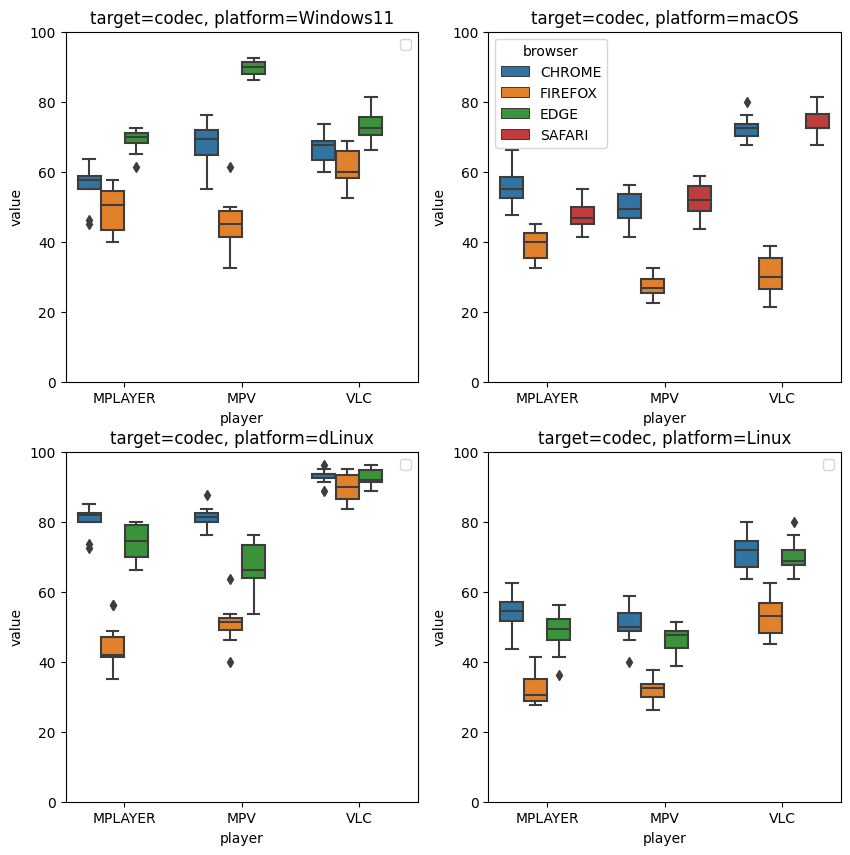

In [102]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="Windows11"))
data = data[data["browser"] != "*"]
boxplot = sns.boxplot(ax=axs[0,0], data=data, x="player", y="value", hue="browser", hue_order=browser_palette.keys(), palette=browser_palette)
boxplot.set(ylim=(0,100))
boxplot.legend([])
boxplot.set_title("target=codec, platform=Windows11")

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="Linux"))
data = data[data["browser"] != "*"]
boxplot = sns.boxplot(ax=axs[1,1], data=data, x="player", y="value", hue="browser", hue_order=browser_palette.keys(), palette=browser_palette)
boxplot.set(ylim=(0,100))
boxplot.legend([])
boxplot.set_title("target=codec, platform=Linux")

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="dLinux"))
data = data[data["browser"] != "*"]
boxplot = sns.boxplot(ax=axs[1,0], data=data, x="player", y="value", hue="browser", hue_order=browser_palette.keys(), palette=browser_palette)
boxplot.set(ylim=(0,100))
boxplot.legend([])
boxplot.set_title("target=codec, platform=dLinux")

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser=None, platform="macOS"))
data = data[data["browser"] != "*"]
boxplot = sns.boxplot(ax=axs[0,1], data=data, x="player", y="value", hue="browser", hue_order=browser_palette.keys(), palette=browser_palette)
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, platform=macOS")

plt.show()

Observation 5: Firefox and Edge are more similar on Windows, while Chrome and Edge are more similar on Linux, being greater than Firefox, when predicting codec.

Observation 6: Observation 5 cannot be observed when predicting player.

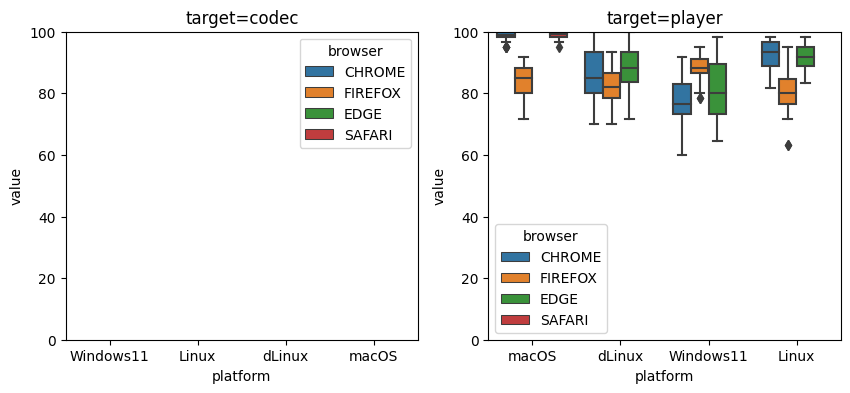

In [103]:
fig, axs = plt.subplots(1,2, figsize=(10, 4))

data = transpose_data(filter_data(all_evaluations, target="codec", player="*", codec="*", browser=None, platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[0], data=data, x="platform", y="value", hue="browser", hue_order=browser_palette.keys(), palette=browser_palette)
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec")

data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[1], data=data, x="platform", y="value", hue="browser", hue_order=browser_palette.keys(), palette=browser_palette)
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player")

plt.show()

Observation 7: Firefox on macOS does not reflect the anomaly of VLC, while we can observe it in other experiments.

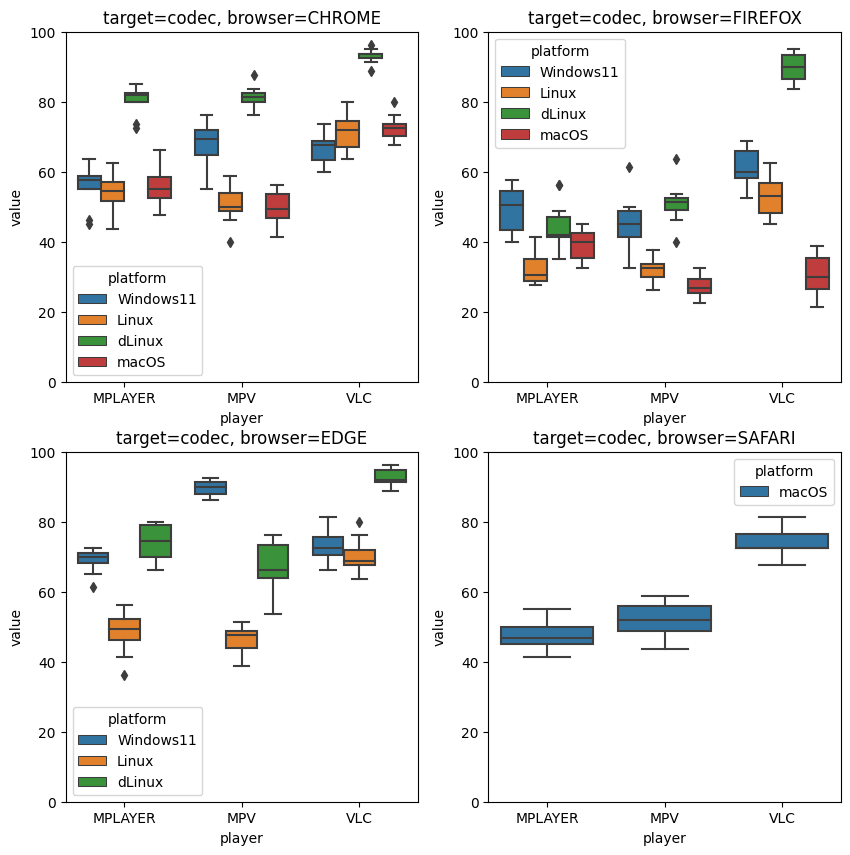

In [104]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="CHROME", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[0,0], data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=CHROME")

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="FIREFOX", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[0,1], data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=FIREFOX")

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="EDGE", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[1,0], data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=EDGE")

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="SAFARI", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[1,1], data=data, x="player", y="value", hue="platform")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec, browser=SAFARI")
plt.show()

# target = player

Observation 8: Windows performs worse when predictiong player, compared to other platforms.

Observation 9: Variation is the smallest when codec is fixed.

Observation 10: Safari is insane.

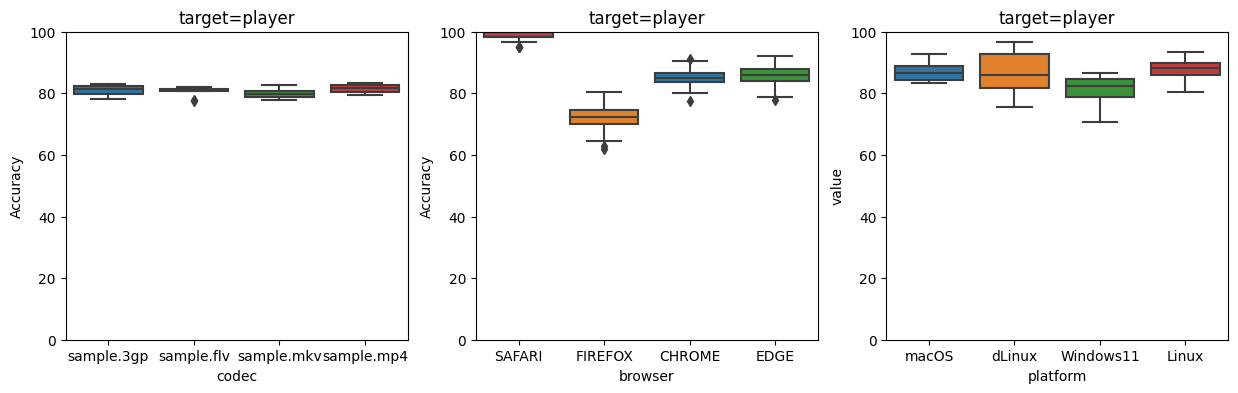

In [105]:
fig, axs = plt.subplots(1,3, figsize=(15, 4))

data1 = transpose_data(filter_data(all_evaluations, target="player", player=None, codec=None, browser="*", platform="*"))
data1 = data1[data1["codec"] != "*"]
fig1 = sns.boxplot(ax=axs[0], data=data1, x="codec", y="value")
fig1.set(ylim=(0,100), ylabel="Accuracy")
fig1.set_title("target=player")

data2 = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="*"))
data2 = data2[data2["browser"] != "*"]
fig2 = sns.boxplot(ax=axs[1], data=data2, x="browser", y="value", palette=browser_palette)
fig2.set(ylim=(0,100), ylabel="Accuracy")
fig2.set_title("target=player")

data3 = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="*", platform=None))
data3 = data3[data3["platform"] != "*"]
fig3 = sns.boxplot(ax=axs[2], data=data3, x="platform", y="value")
fig3.set(ylim=(0,100))
fig3.set_title("target=player")

plt.show()

Observation 11: Chrome is inconsistent with other players when the codec is .3gp and .mkv and we are trying to predict the player.

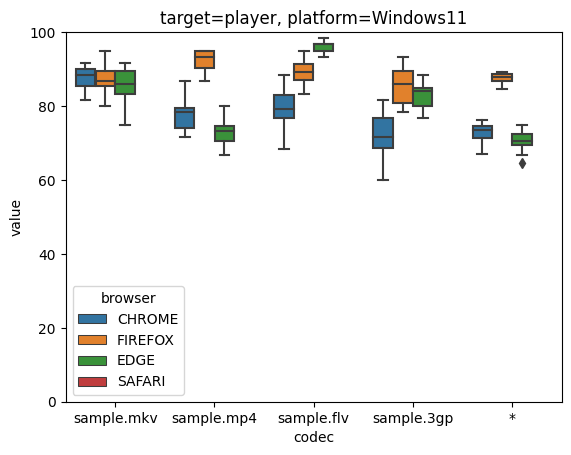

In [106]:
data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser=None, platform="Windows11"))
data = data[data["browser"] != "*"]
boxplot = sns.boxplot(data=data, x="codec", y="value", hue="browser", hue_order=browser_palette.keys(), palette=browser_palette)
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, platform=Windows11")
plt.show()

Observation 12: Safari is again insane.

Observation 13: Variation of Chrome is more than Firefox, followed by Edge and Safari.

Observation 14: Firefox on Windows and Linux perform pretty similar, while Firfox on macOS is more successful.

Observation 15: Chrome on Linux and macOS perform pretty similar, while Windows performs wawy worse than others.

Observation 16: Edge :D

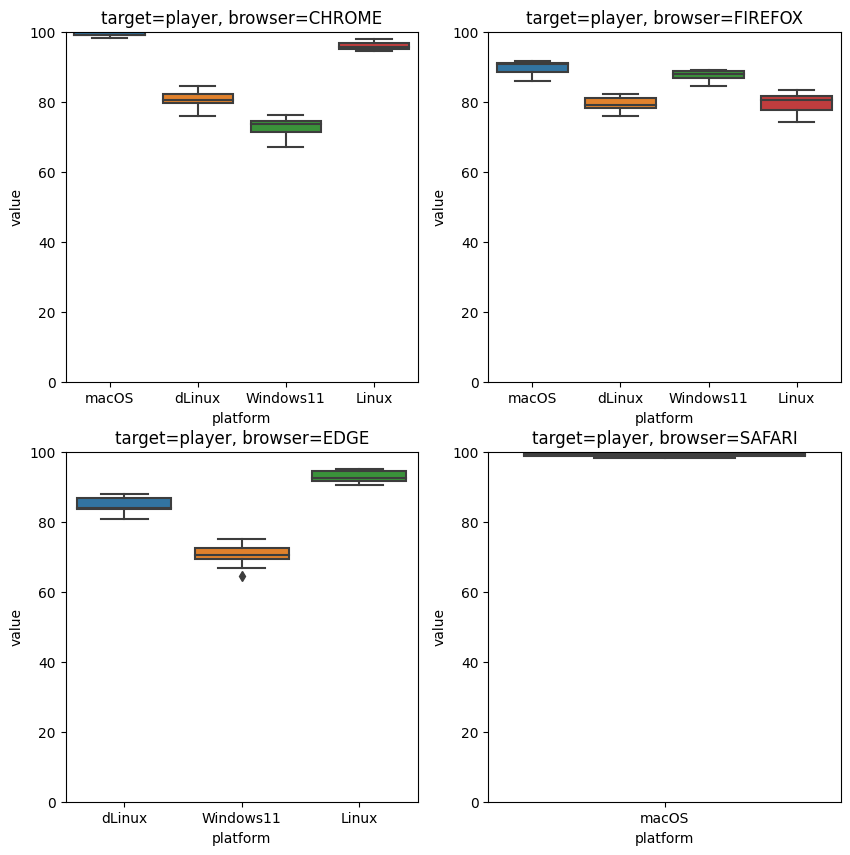

In [107]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))

data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec="*", browser="CHROME", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[0,0], data=data, x="platform", y="value")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=CHROME")

data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec="*", browser="FIREFOX", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[0,1], data=data, x="platform", y="value")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=FIREFOX")

data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec="*", browser="EDGE", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[1,0], data=data, x="platform", y="value")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=EDGE")

data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec="*", browser="SAFARI", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[1,1],data=data, x="platform", y="value")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=player, browser=SAFARI")
plt.show()

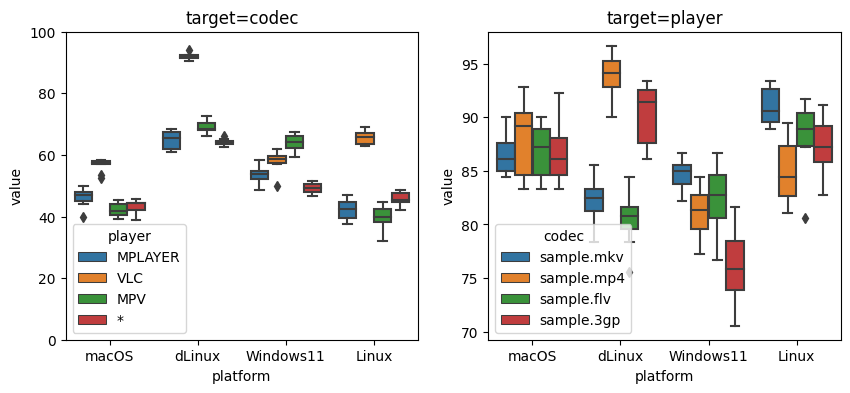

In [108]:
fig, axs = plt.subplots(1,2, figsize=(10, 4))

data = transpose_data(filter_data(all_evaluations, target="codec", player=None, codec="*", browser="*", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[0], data=data, x="platform", y="value", hue="player")
boxplot.set(ylim=(0,100))
boxplot.set_title("target=codec")

data = transpose_data(filter_data(all_evaluations, target="player", player="*", codec=None, browser="*", platform=None))
data = data[data["platform"] != "*"]
boxplot = sns.boxplot(ax=axs[1], data=data, x="platform", y="value", hue="codec")
#boxplot.set(ylim=(0,100))
boxplot.set_title("target=player")
plt.show()